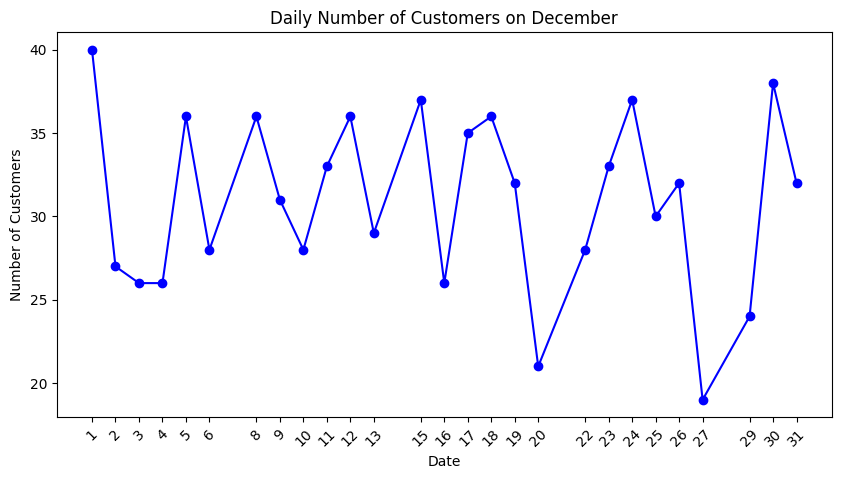

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data hanya untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers per tanggal
daily_customers = df_december.groupby(df_december['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_customers.index, daily_customers.values, marker='o', linestyle='-', color='b')

# Mengatur label pada sumbu-x menjadi tanggal
ax.set_xticks(daily_customers.index)
ax.set_xticklabels(daily_customers.index, rotation=45)

# Menambahkan judul dan label sumbu
plt.title('Daily Number of Customers on December')
plt.xlabel('Date')
plt.ylabel('Number of Customers')

# Menampilkan line chart
plt.show()

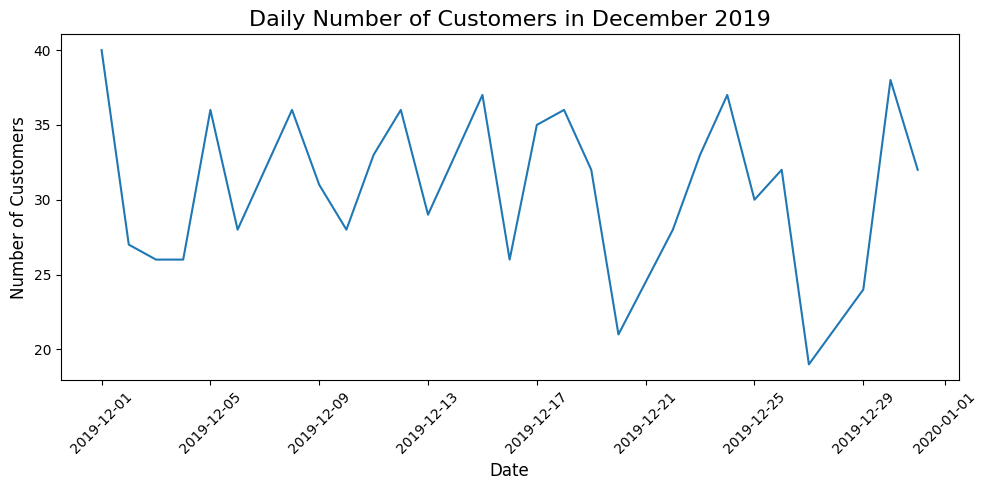

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari CSV
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Ubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data hanya untuk bulan Desember 2019
december_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Hitung jumlah unique customers per tanggal
daily_customers = december_data.groupby('order_date')['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values)
plt.title('Daily Number of Customers in December 2019', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan line chart
plt.show()

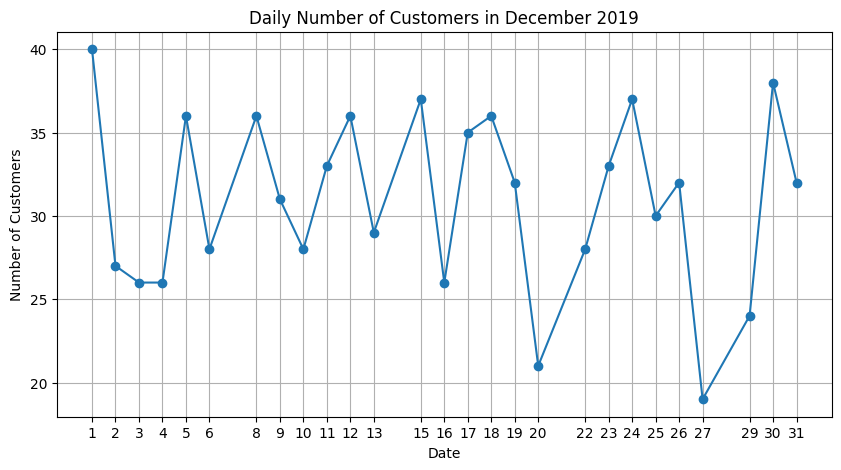

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(daily_customers.index)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])
# Mengambil data penjualan bulan Desember 2019 hanya untuk top 5 brand
top5_brands = december_data.groupby('brand')['quantity'].sum().nlargest(5).index
dataset_top5brand_dec = december_data[december_data['brand'].isin(top5_brands)]

# Menampilkan top 5 brands
print('Top 5 brands in December 2019:')
print(top5_brands)

Top 5 brands in December 2019:
Index(['BRAND_S', 'BRAND_P', 'BRAND_R', 'BRAND_C', 'BRAND_A'], dtype='object', name='brand')


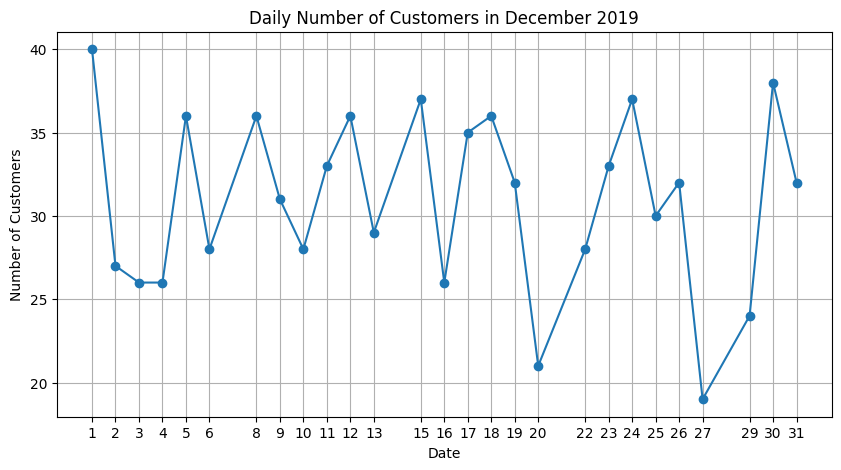

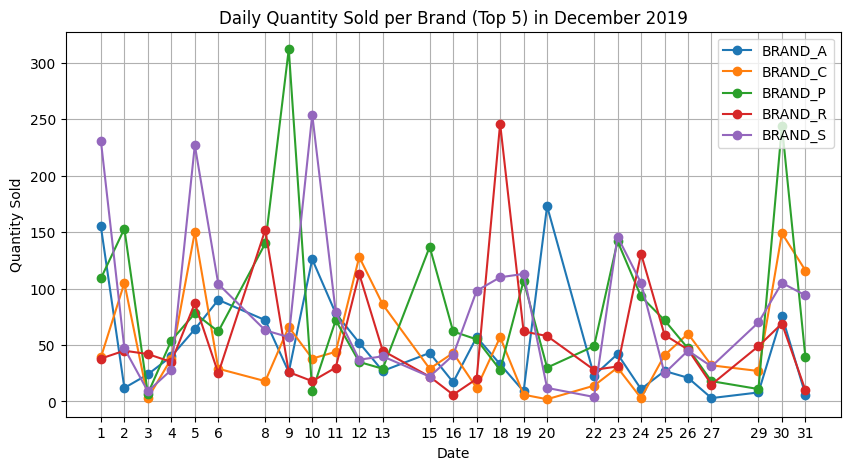

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(daily_customers.index)
plt.grid(True)
plt.show()

# Mengambil data penjualan bulan Desember 2019 hanya untuk top 5 brand
top5_brands = december_data.groupby('brand')['quantity'].sum().nlargest(5).index
dataset_top5brand_dec = december_data[december_data['brand'].isin(top5_brands)]

# Menghitung jumlah quantity terjual per brand per tanggal
daily_quantity_per_brand = dataset_top5brand_dec.pivot_table(index=dataset_top5brand_dec['order_date'].dt.day,
                                                            columns='brand',
                                                            values='quantity',
                                                            aggfunc='sum')

# Membuat multi-line chart
plt.figure(figsize=(10, 5))
for brand in daily_quantity_per_brand.columns:
    plt.plot(daily_quantity_per_brand.index, daily_quantity_per_brand[brand], marker='o', label=brand)

# Menambahkan anotasi untuk titik lonjakan
max_quantity_date = daily_quantity_per_brand.sum(axis=1).idxmax()
max_quantity = daily_quantity_per_brand.sum(axis=1).max()
plt.annotate(f'Max: {max_quantity}', xy=(max_quantity_date, max_quantity),
             xytext=(max_quantity_date, max_quantity+100), arrowprops=dict(arrowstyle='->'))

plt.title('Daily Quantity Sold per Brand (Top 5) in December 2019')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(daily_quantity_per_brand.index)
plt.legend()
plt.grid(True)
plt.show()

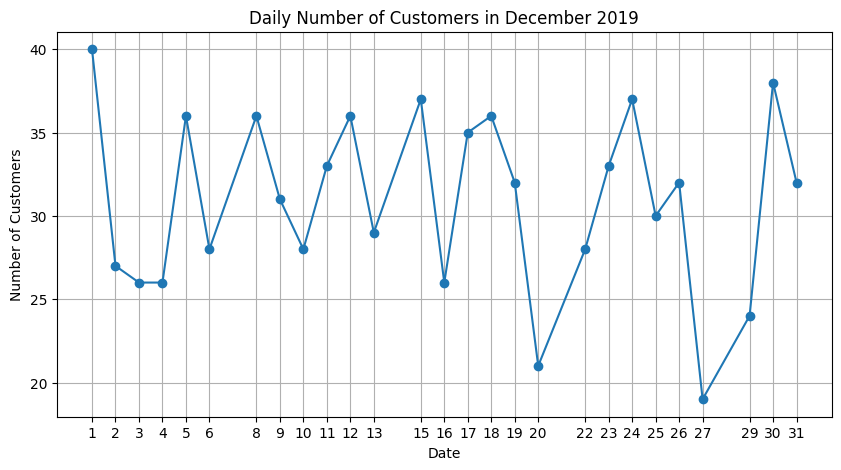

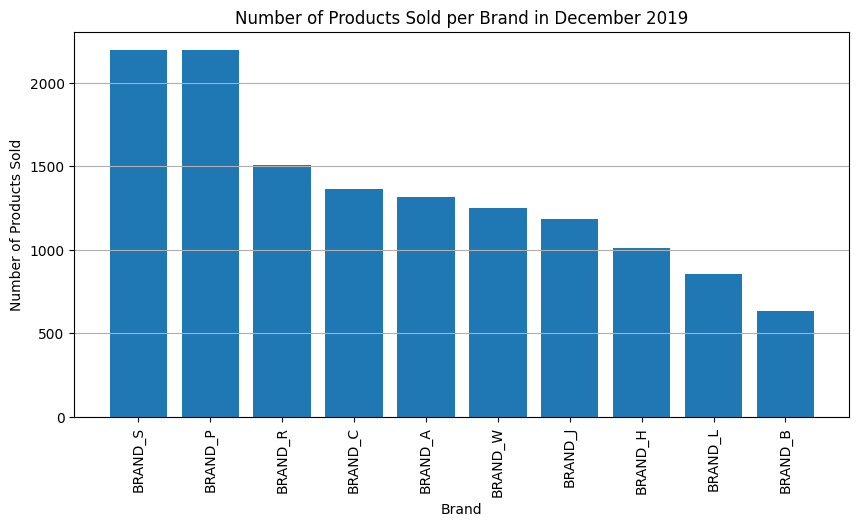

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(daily_customers.index)
plt.grid(True)
plt.show()

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah product terjual per brand
product_count_per_brand = december_data.groupby('brand')['quantity'].sum().sort_values(ascending=False)

# Membuat barchart
plt.figure(figsize=(10, 5))
plt.bar(product_count_per_brand.index, product_count_per_brand.values)
plt.title('Number of Products Sold per Brand in December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

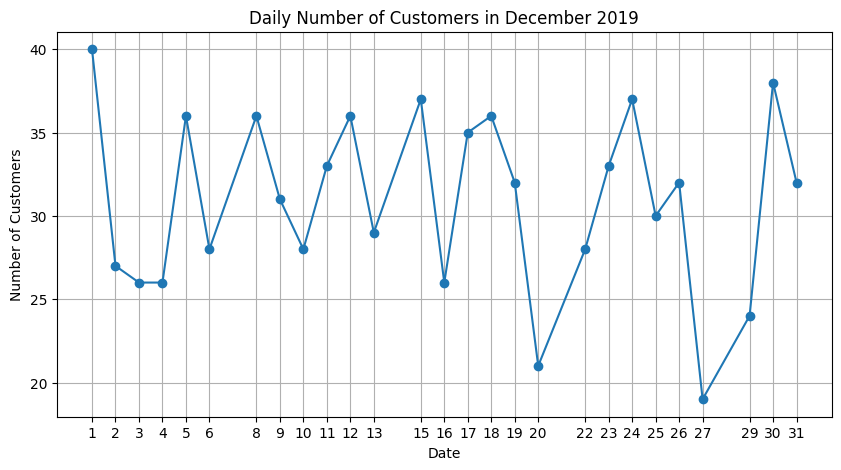

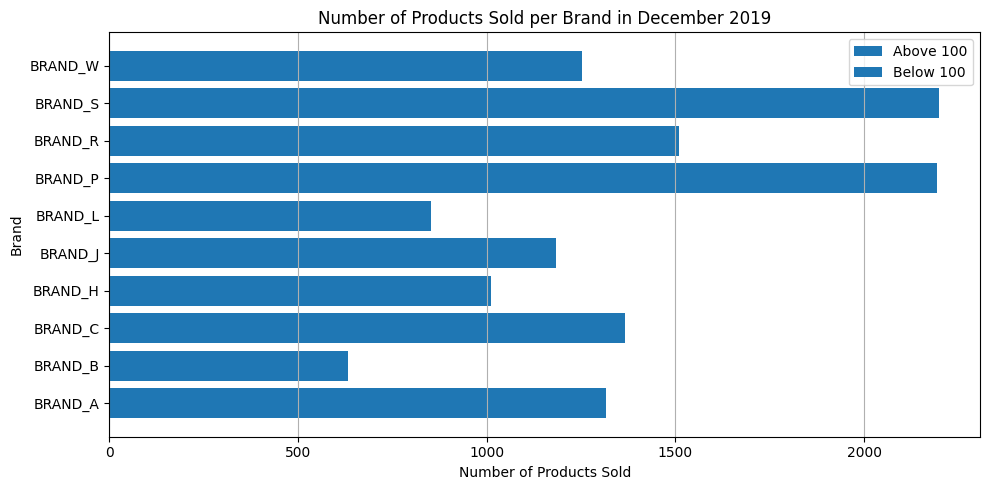

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Mencari jumlah pembeli harian
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Menghitung jumlah produk terjual per brand
product_count_per_brand = december_data.groupby('brand')['quantity'].sum()

# Memisahkan data penjualan di atas 100 dan di bawah 100
above_100 = product_count_per_brand[product_count_per_brand >= 100]
below_100 = product_count_per_brand[product_count_per_brand < 100]

# Membuat line chart jumlah pembeli harian
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(daily_customers.index)
plt.grid(True)
plt.show()

# Membuat stacked chart jumlah produk terjual per brand
plt.figure(figsize=(10, 5))
plt.barh(above_100.index, above_100.values, label='Above 100')
plt.bar(below_100.index, below_100.values, label='Below 100', left=above_100.values)
plt.title('Number of Products Sold per Brand in December 2019')
plt.xlabel('Number of Products Sold')
plt.ylabel('Brand')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

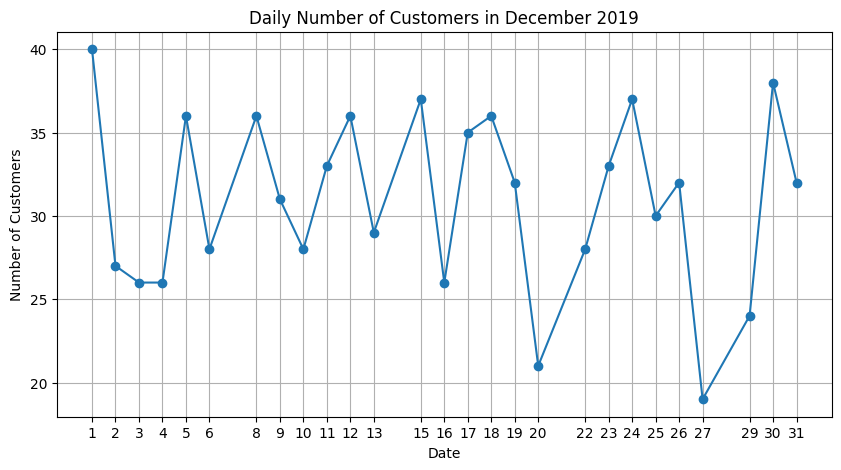

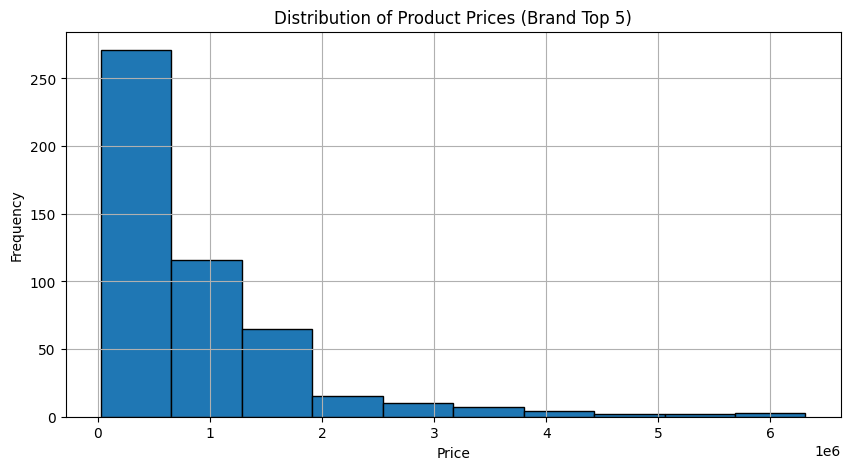

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Mencari jumlah pembeli harian
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Mengambil data produk dari brand-brand top 5
top_5_brands = december_data['brand'].value_counts().head(5).index
top_5_products = december_data[december_data['brand'].isin(top_5_brands)]

# Menghitung median harga per produk
product_prices = top_5_products.groupby('product_id')['item_price'].median()

# Membuat line chart jumlah pembeli harian
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(daily_customers.index)
plt.grid(True)
plt.show()

# Membuat histogram distribusi harga produk
plt.figure(figsize=(10, 5))
plt.hist(product_prices, bins=10, edgecolor='k')
plt.title('Distribution of Product Prices (Brand Top 5)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


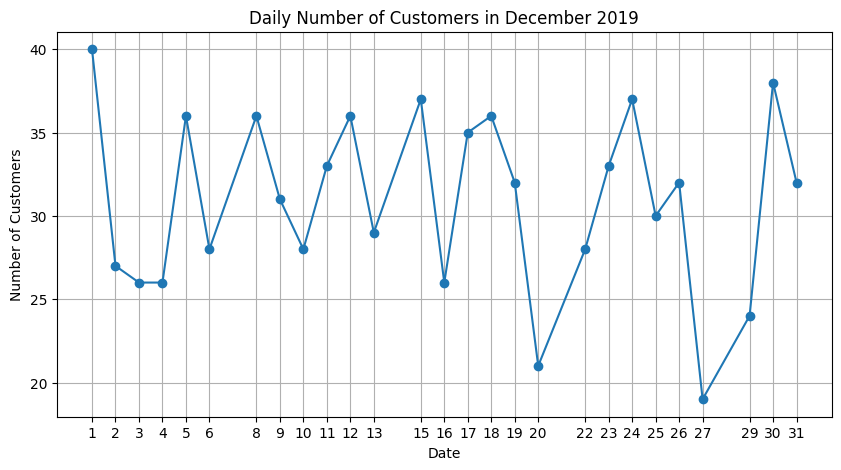

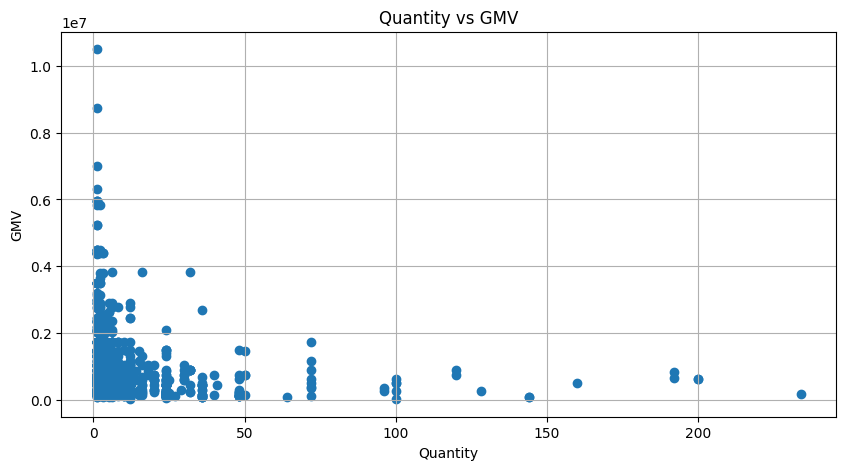

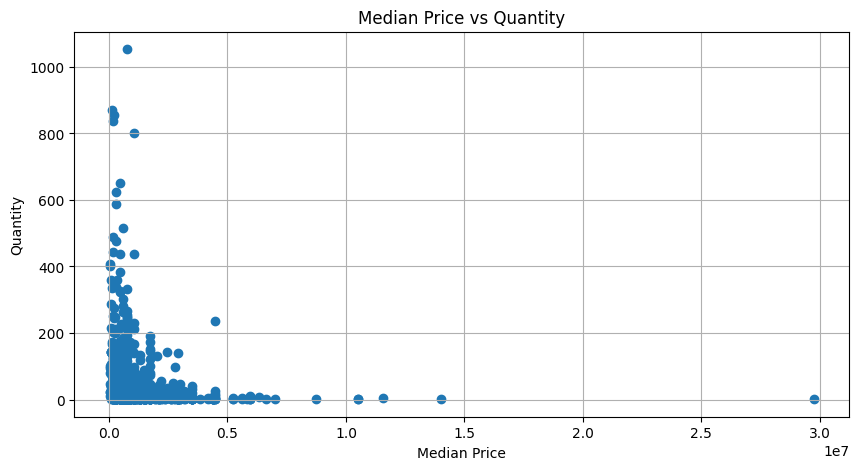

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah tipe data pada kolom 'order_date' menjadi datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Mencari jumlah pembeli harian
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart jumlah pembeli harian
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(daily_customers.index)
plt.grid(True)
plt.show()

# Case 6a: Korelasi quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(december_data['quantity'], december_data['item_price'])
plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.grid(True)
plt.show()

# Case 6b: Korelasi median harga vs quantity
median_prices = df.groupby('product_id')['item_price'].median()

plt.figure(figsize=(10, 5))
plt.scatter(median_prices, df.groupby('product_id')['quantity'].sum())
plt.title('Median Price vs Quantity')
plt.xlabel('Median Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()